In [1]:
import time
import random
import math
import array
import pandas as pd
#from threading import Thread 
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from CenterPiezoRS import center_piezo
from GrabLocation import grab_location
#from BlasterDatacollection import dataB
from Movements import move_negB,move_posB,move_negA,move_posA
import config_constants as cc

<IPython.core.display.Javascript object>

In [2]:
trials = input('Enter number of trials:')
name = 'AutoXYTest'
t = time.localtime()
current_time = time.strftime('_%Y%m%d_%H%M%S', t)
name = name+current_time
print(name)
x = 0
y = 0

Enter number of trials:100
AutoXYTest_20230124_145445


In [3]:
#generate random movetable
i = 1
randxs = []
randys = []

while i <= int(trials):
    circle_x = cc.circle['circle_x'] 
    circle_y = cc.circle['circle_y']    
    circle_r = cc.circle['circle_r']
    alpha = 2 * math.pi * random.random() #random angle
    r = circle_r * math.sqrt(random.random()) #random radius
    randx = r * math.cos(alpha) + circle_x #calculating coordinates
    randy = r * math.sin(alpha) + circle_y
    #print("Random point", (randx, randy))
    randxs.append(randx)
    #print('Random x:',randxs)
    randys.append(randy)
    #print('Random y:',randys)
    
    i += 1
else:
    print('Random x:',randxs)
    print('Random y:',randys)

Random x: [6.591576174635724, 6.287681990605824, 5.5602196440371925, 6.926236894575364, 6.959680881678805, 4.113125785381146, 5.846101360345847, 5.322200993836383, 5.67762228125248, 3.744189525449392, 4.292682166589776, 4.300518855243215, 3.654587682717148, 7.048530886939823, 4.726911414119066, 6.532154372479466, 4.673156488291856, 6.781114118705336, 3.871203200838697, 5.1663591158777225, 7.664947081501381, 7.095456841304397, 6.523747817855168, 4.394372086068163, 6.296439066254481, 4.937377793123169, 5.551812332569318, 7.565946535572662, 6.24475860972429, 5.039281573199642, 7.412372910062246, 7.192273573695161, 5.091406177620751, 6.494496098806504, 5.318255690712536, 7.618871235421357, 7.670730306372676, 3.7523942454720114, 4.461913598745605, 5.4073458889803225, 5.595819842461481, 5.544803531602363, 6.403153926352836, 7.327287193506112, 4.344503307911714, 6.605013630221937, 3.774381771886694, 6.400947167887666, 6.489068208905111, 5.56385647115945, 3.809024937954838, 4.292429745572614, 

In [4]:
#or create your movetable
goalx = [6.5,5.5,4.5,5.5]
goaly = [6.5,7.5,6.5,5.5]

<IPython.core.display.Javascript object>

,original_pos_xy,Final_pos_xy,max_xy,min_xy,Radius_x,Radius_y,Area
0,"(6.4814, 7.7326)","([6.4814], [7.7326])","(6.4814, 7.7326)","(6.4814, 7.7326)",0.0,0.0,0.0


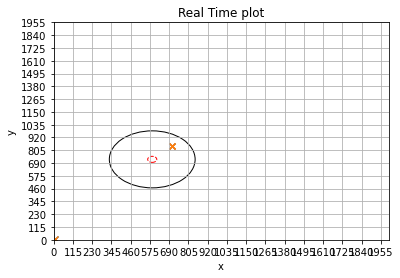

('USB0::0x2A8D::0x0387::CN61022130::0::INSTR', 'USB0::0xF4ED::0xEE3A::388C14124::0::INSTR', 'TCPIP0::K-34465A-15446::hislip0::INSTR', 'TCPIP0::K-34465A-15446::inst0::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL6::INSTR')
-1.0614 -1.0825999999999993
Configuring C2
('USB0::0x2A8D::0x0387::CN61022130::0::INSTR', 'USB0::0xF4ED::0xEE3A::388C14124::0::INSTR', 'TCPIP0::K-34465A-15446::hislip0::INSTR', 'TCPIP0::K-34465A-15446::inst0::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL6::INSTR')
Configuring C1


VisaIOError: VI_ERROR_IO (-1073807298): Could not perform operation because of I/O error.

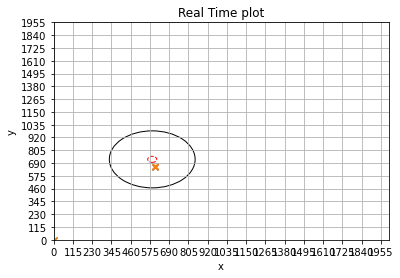

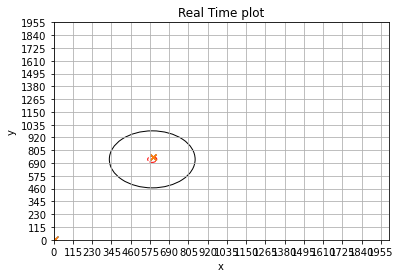

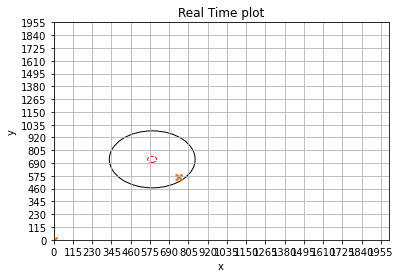

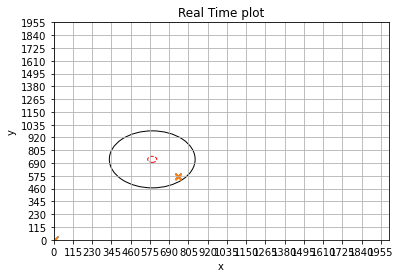

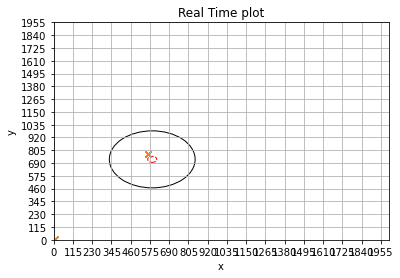

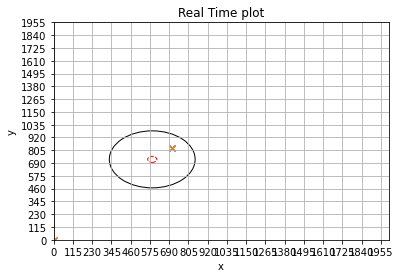

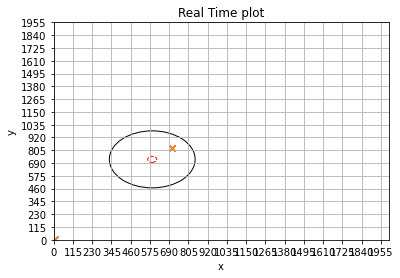

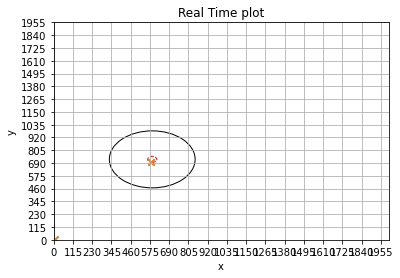

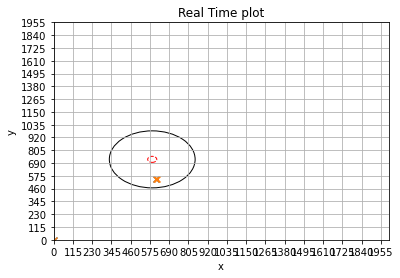

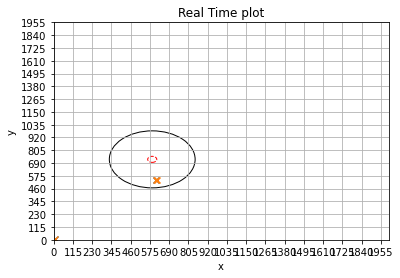

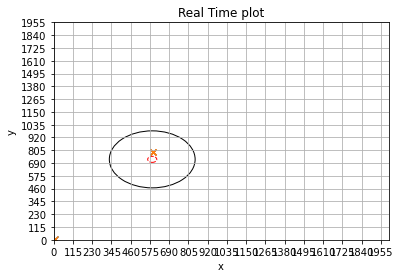

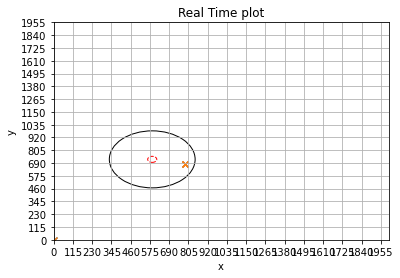

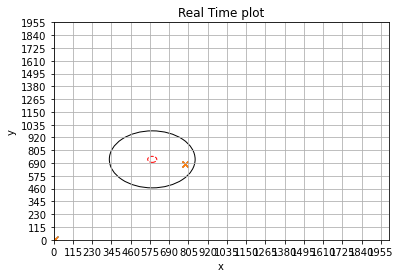

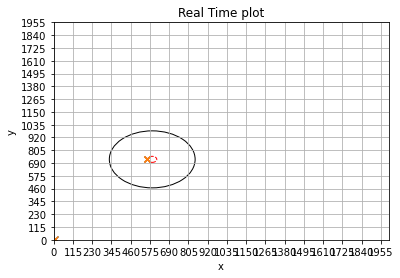

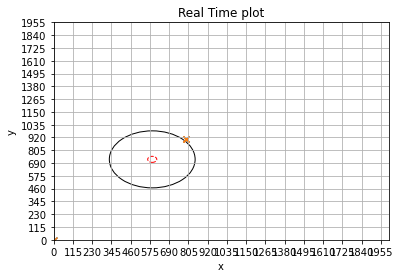

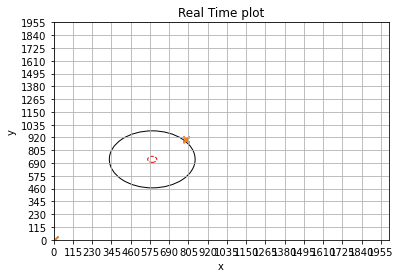

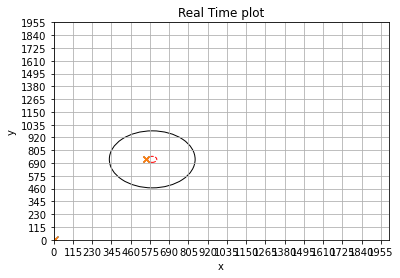

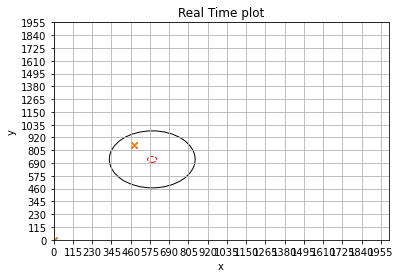

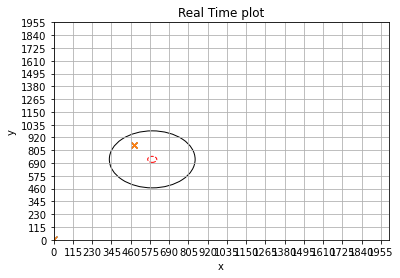

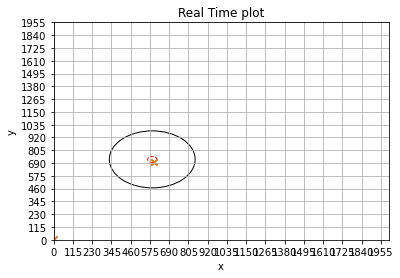

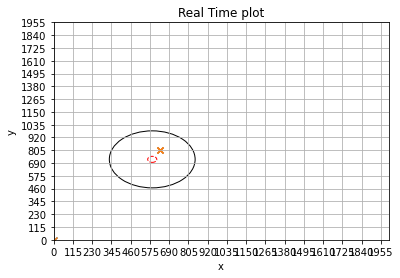

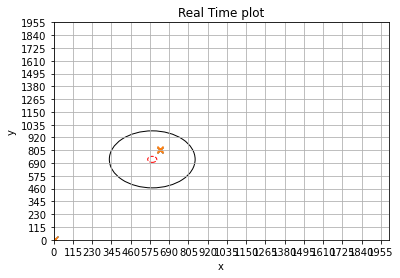

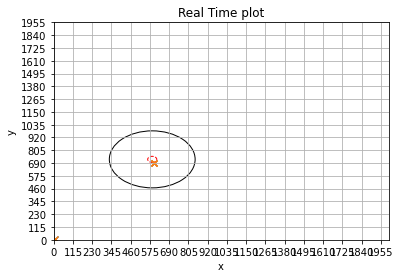

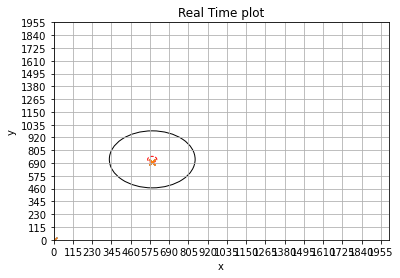

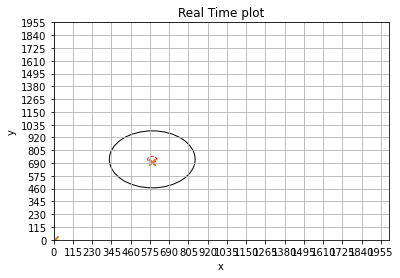

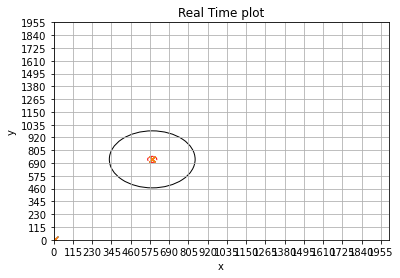

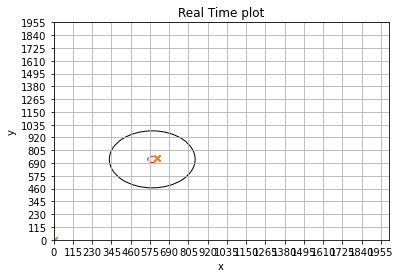

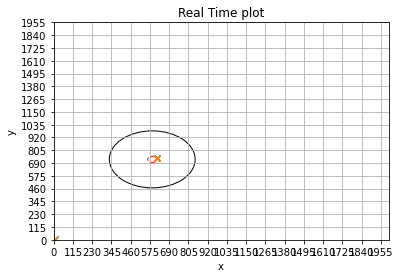

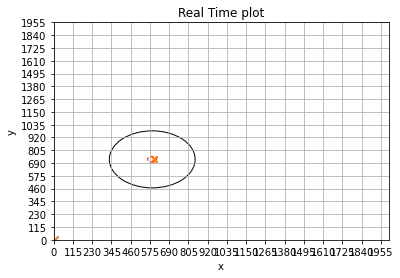

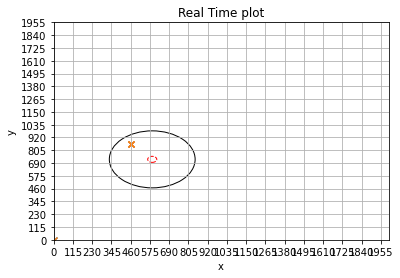

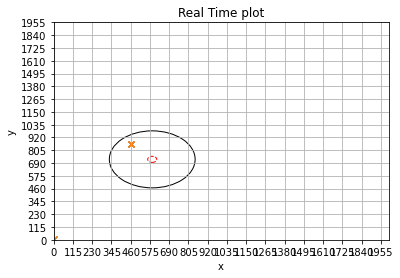

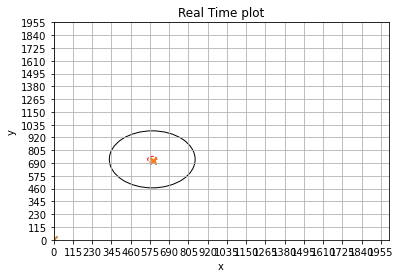

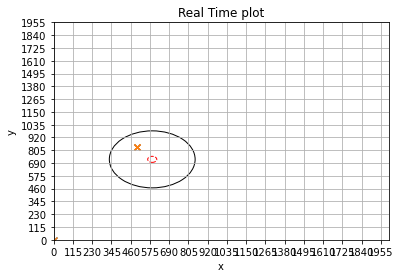

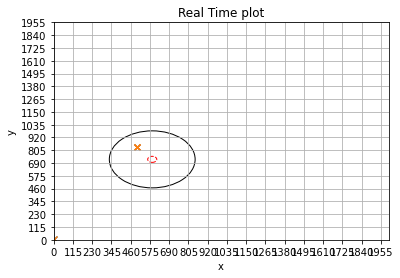

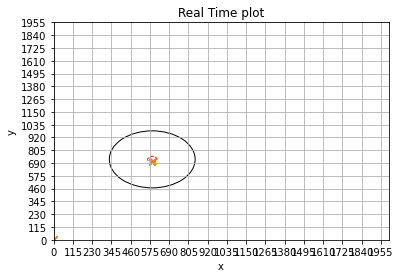

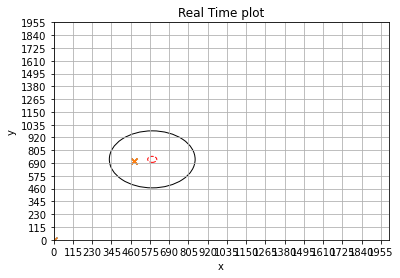

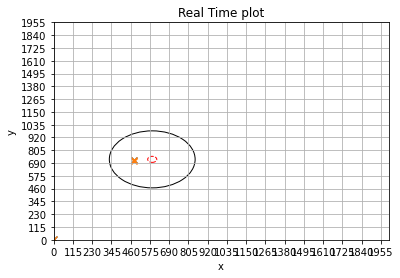

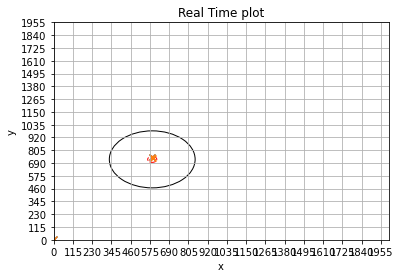

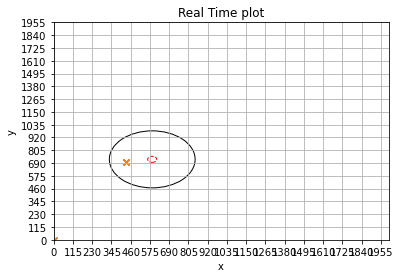

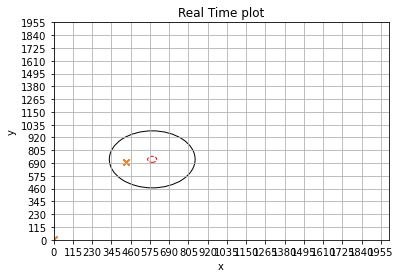

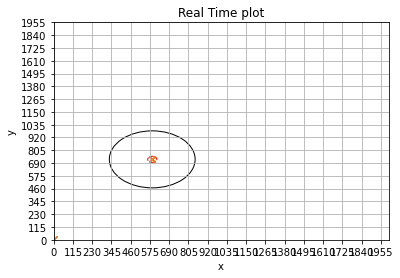

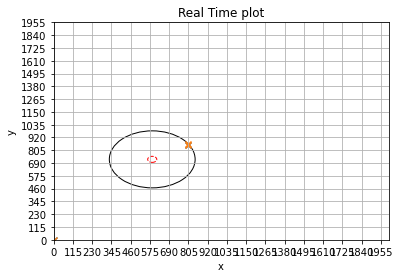

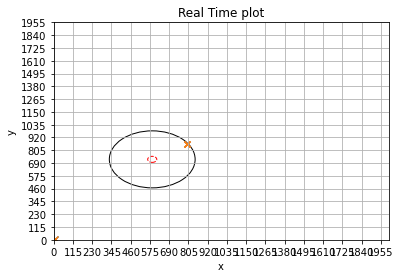

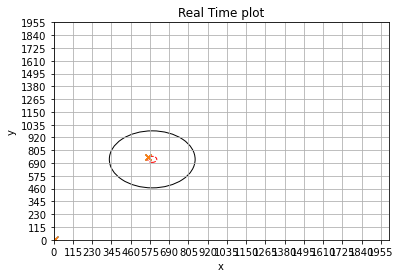

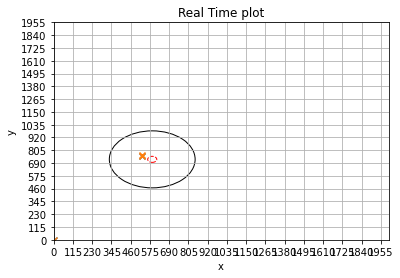

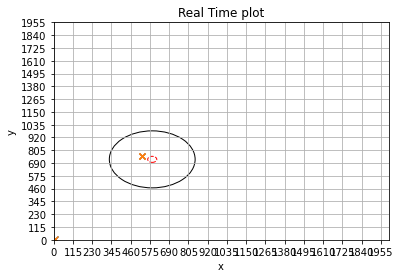

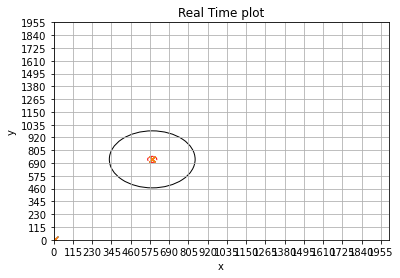

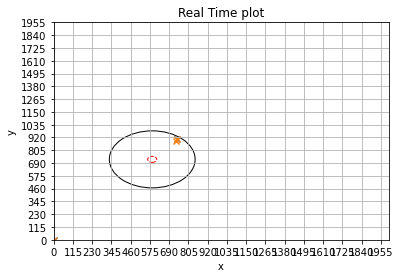

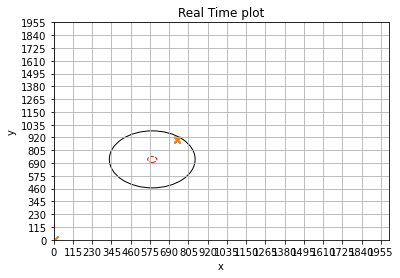

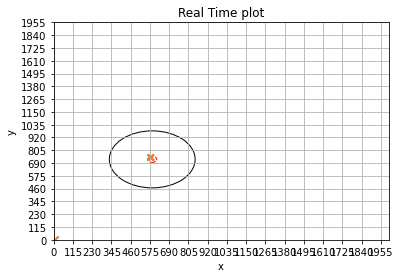

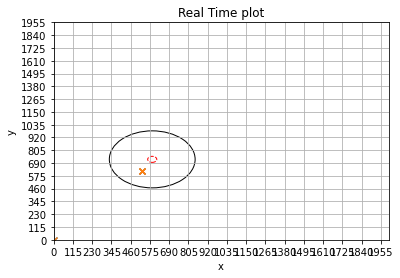

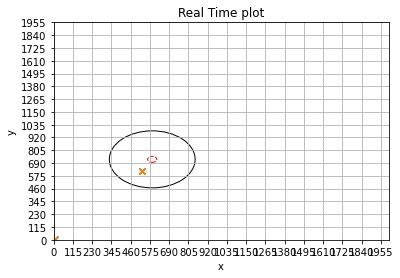

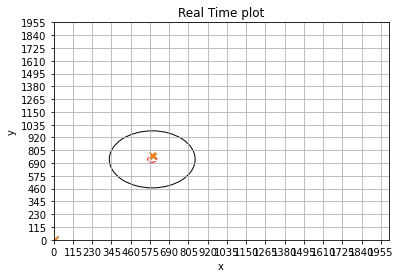

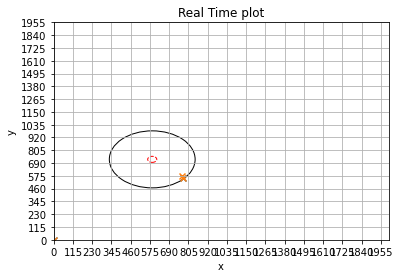

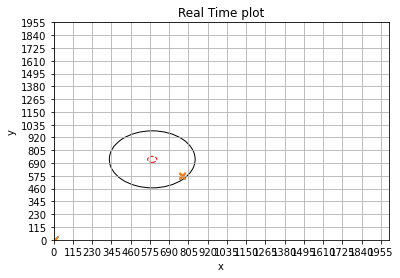

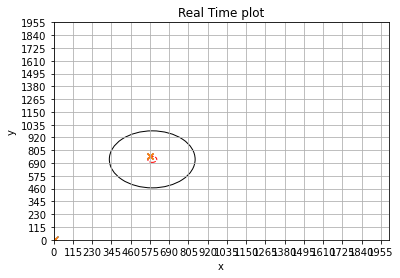

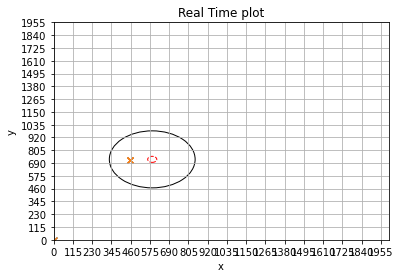

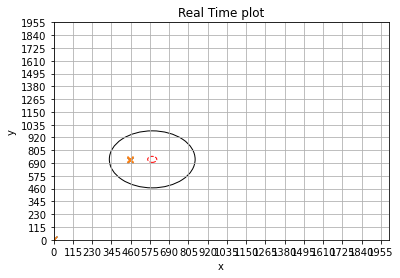

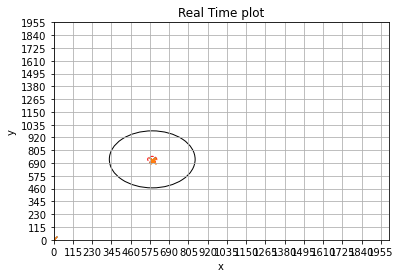

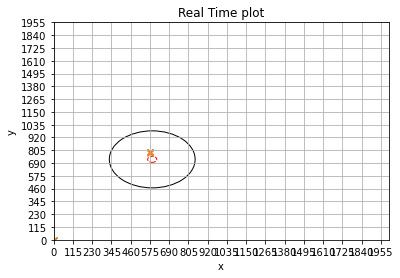

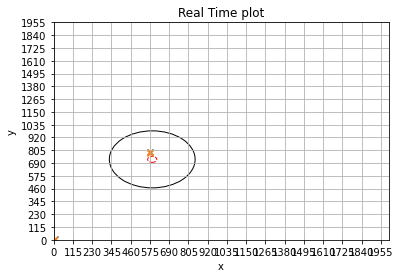

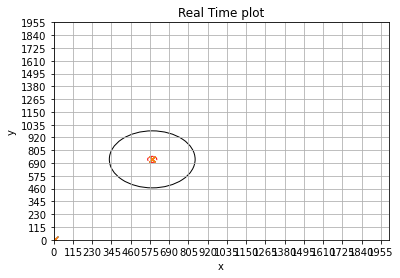

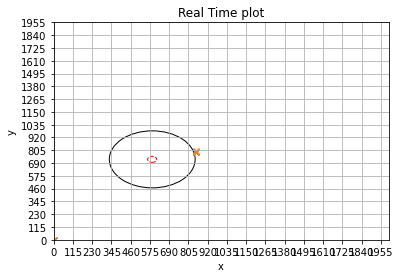

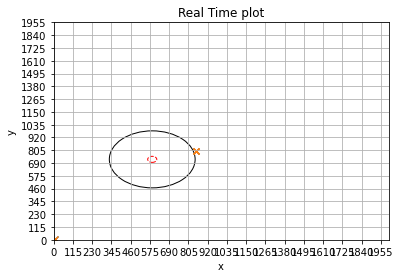

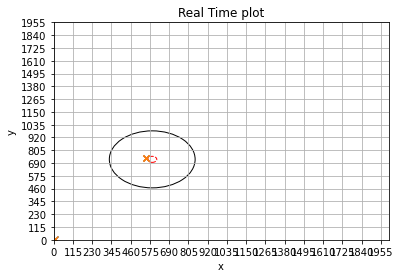

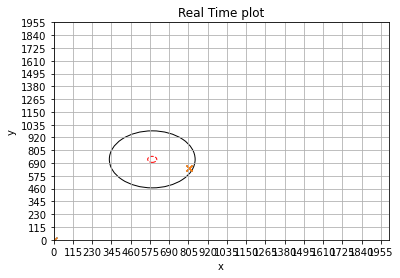

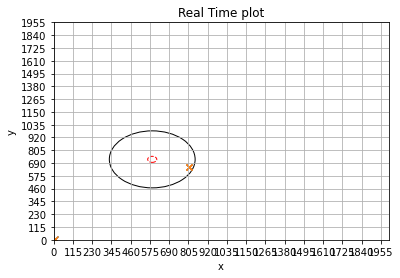

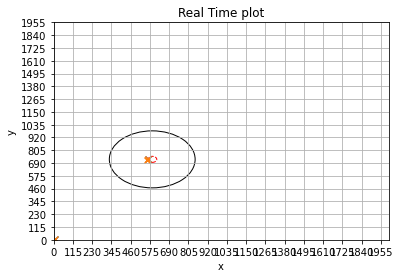

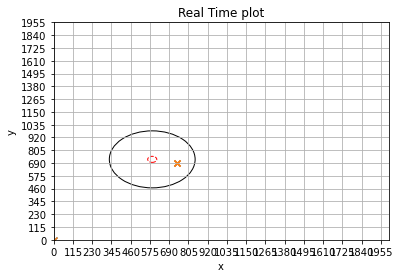

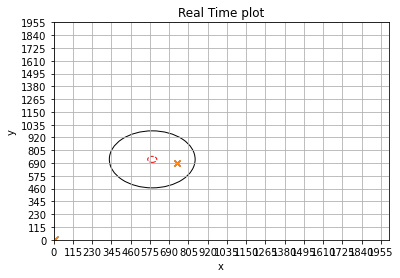

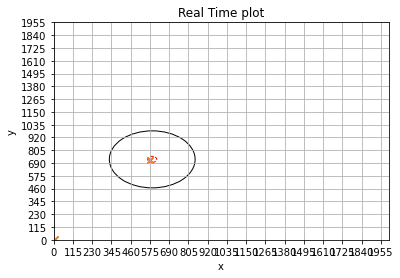

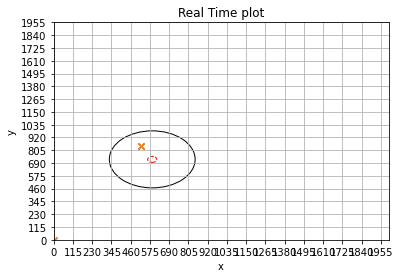

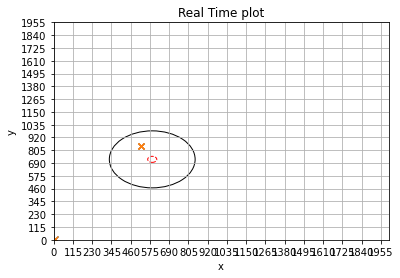

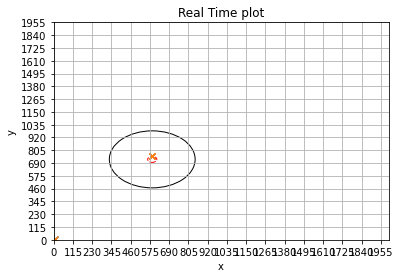

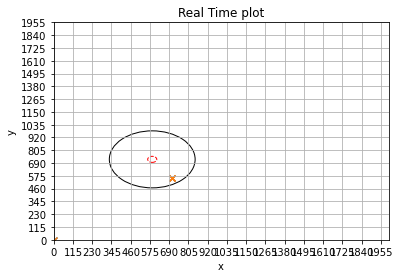

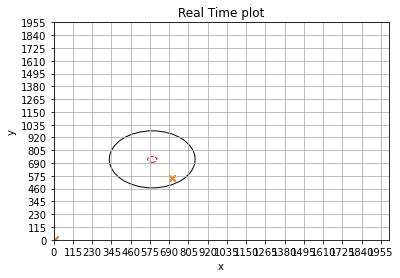

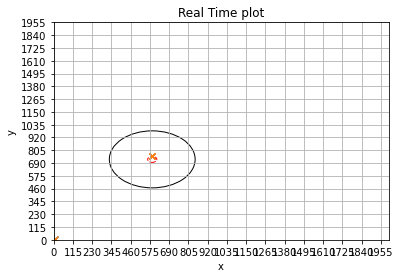

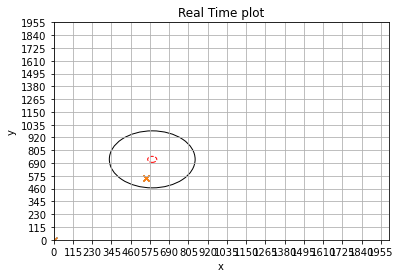

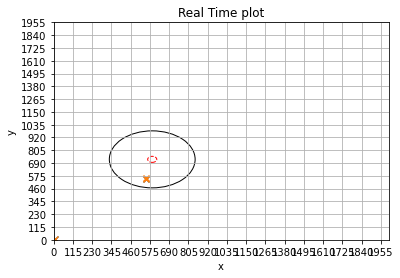

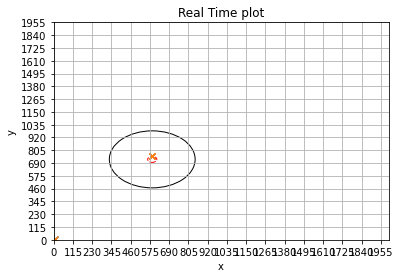

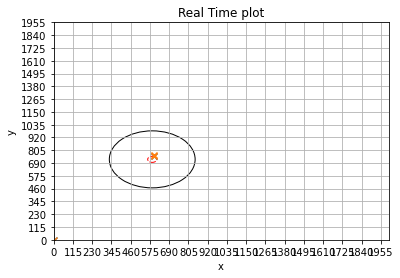

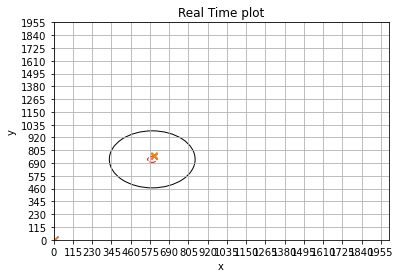

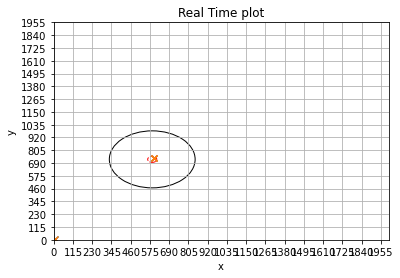

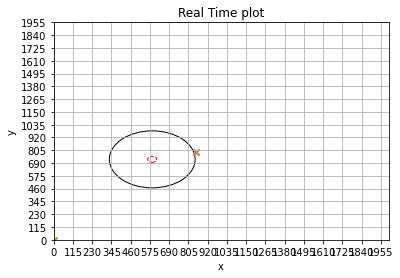

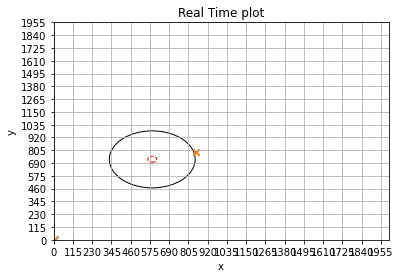

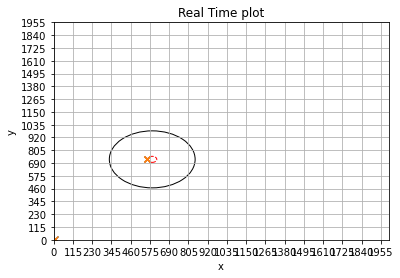

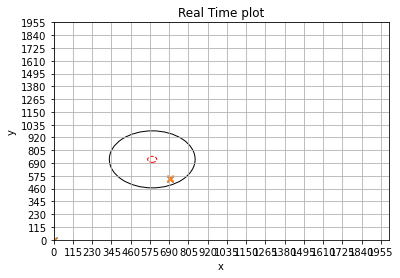

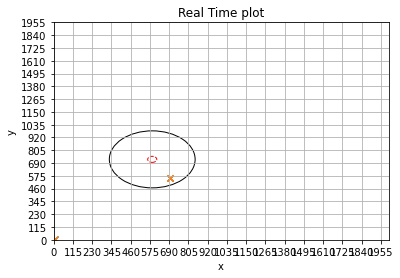

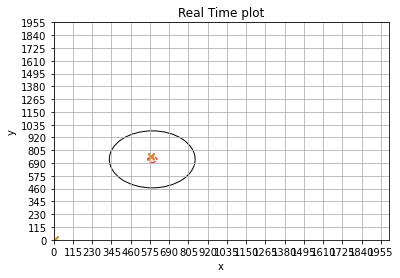

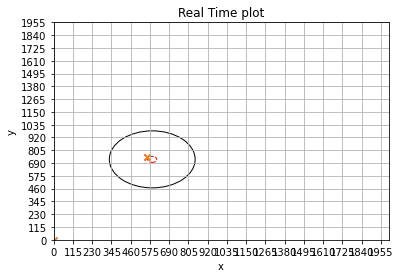

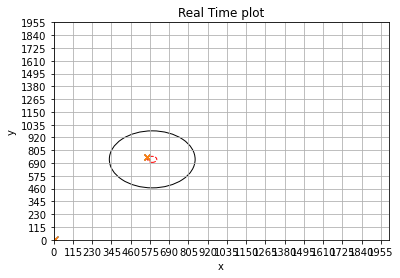

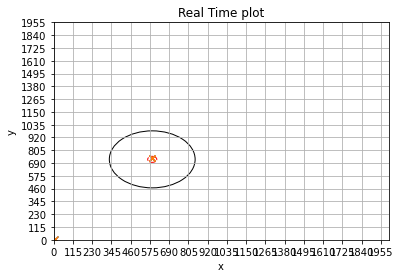

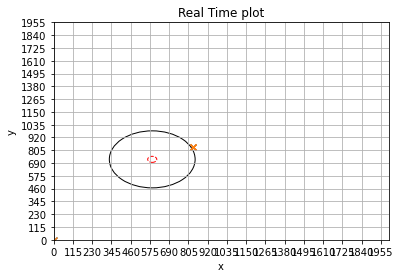

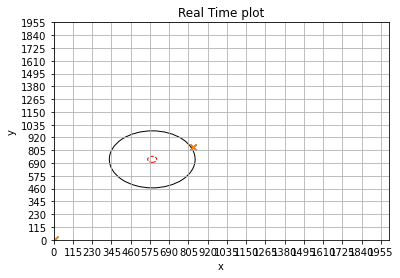

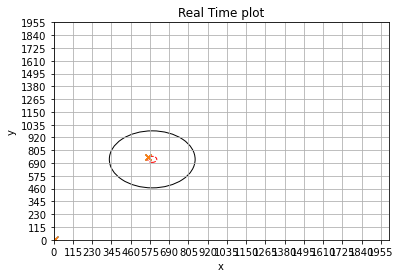

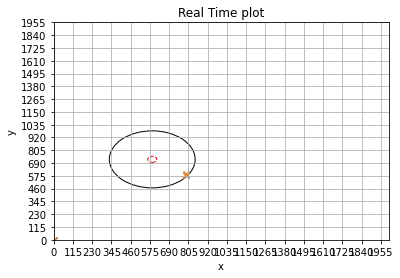

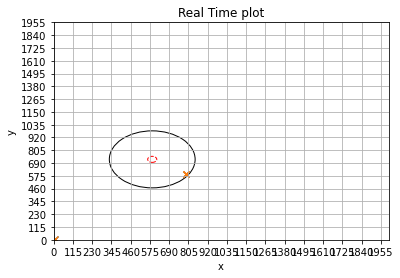

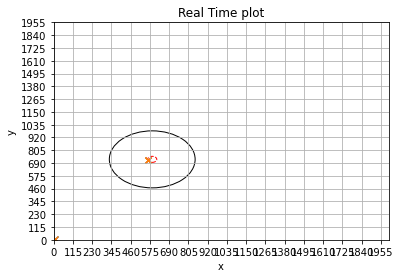

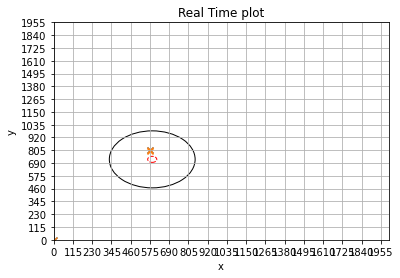

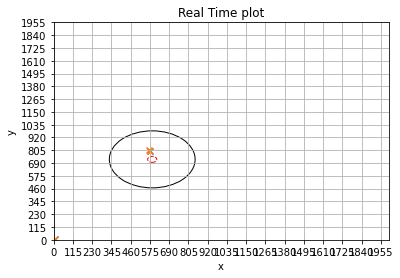

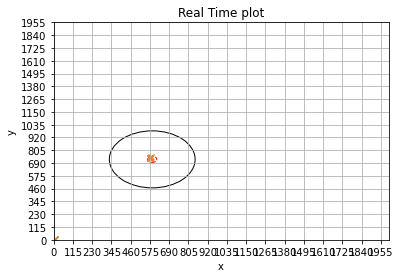

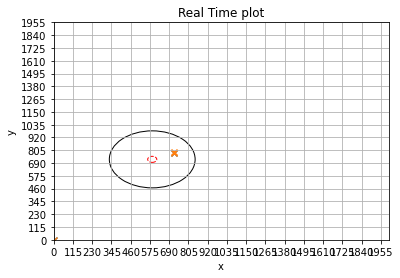

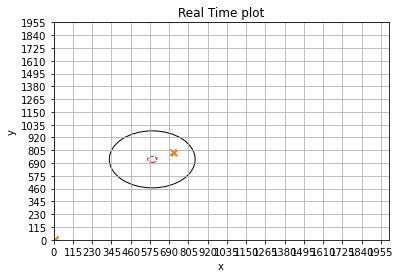

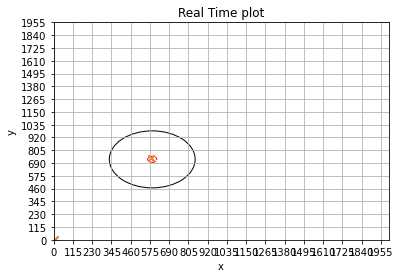

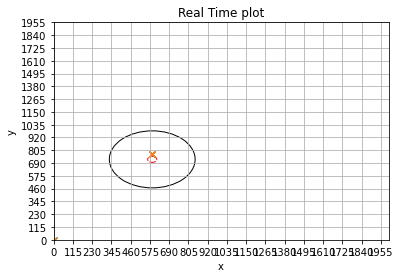

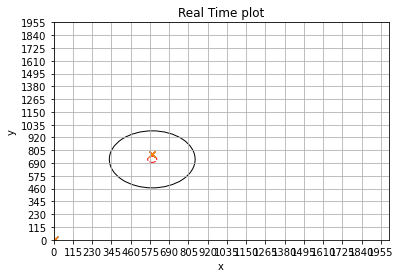

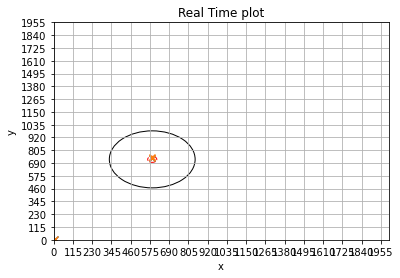

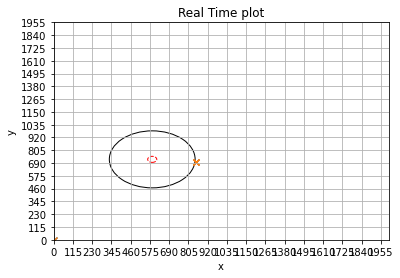

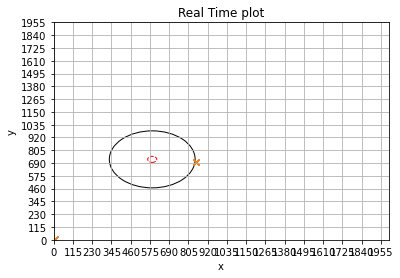

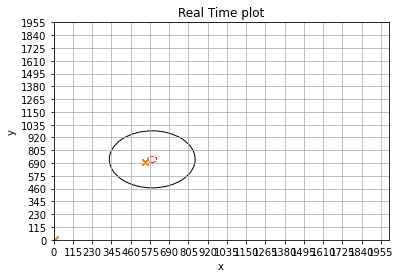

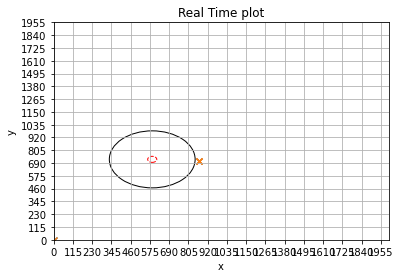

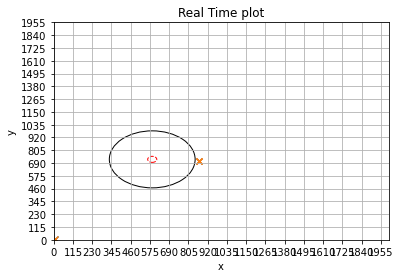

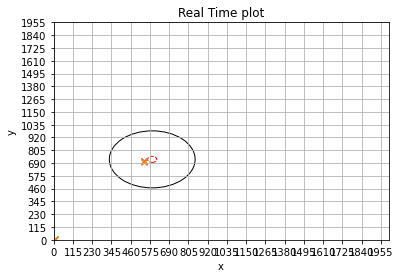

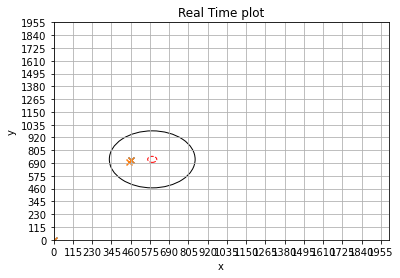

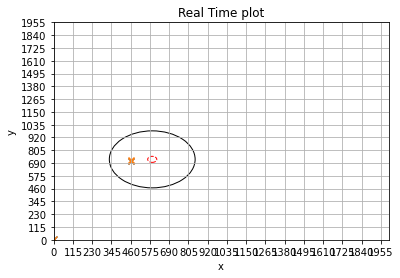

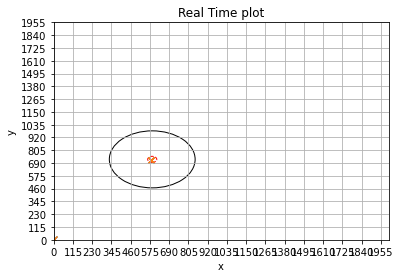

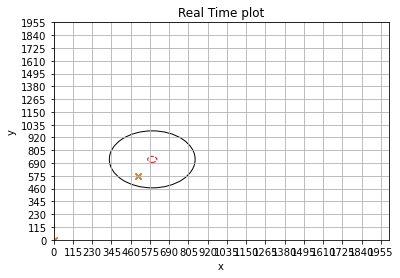

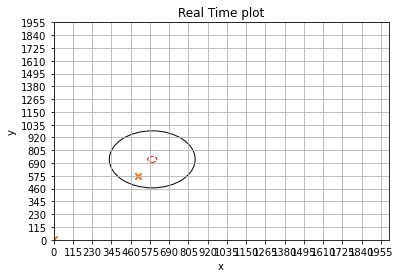

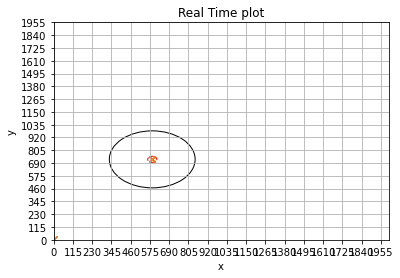

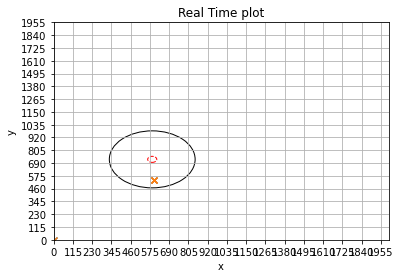

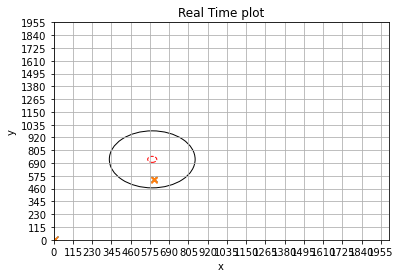

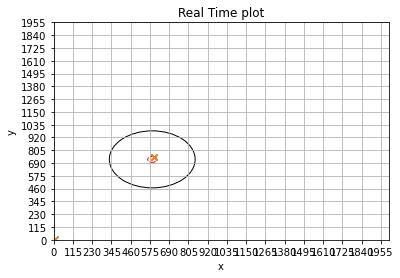

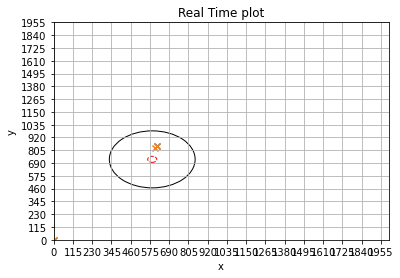

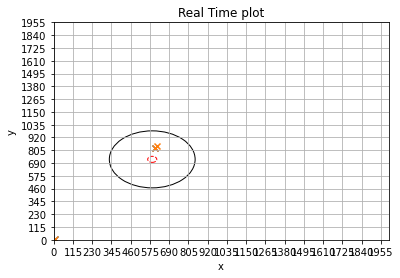

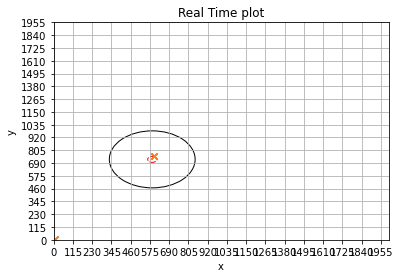

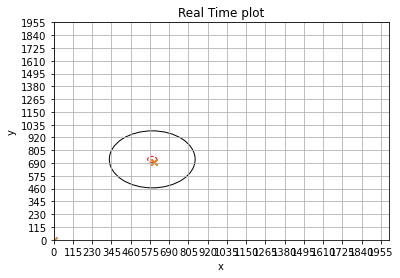

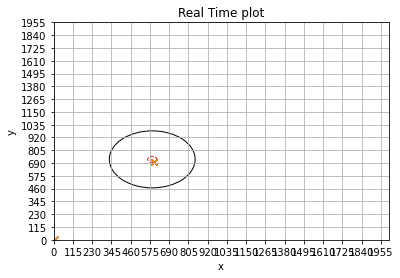

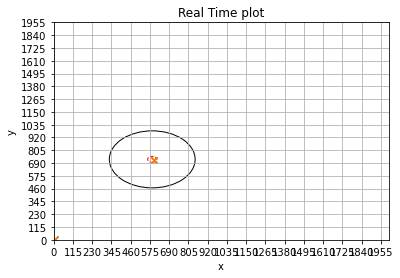

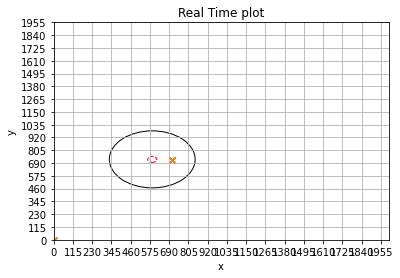

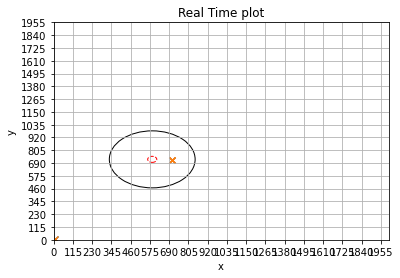

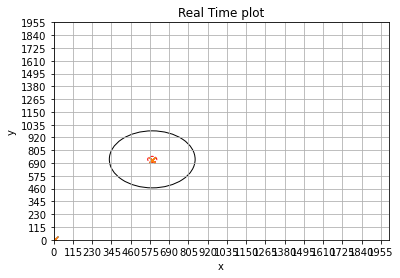

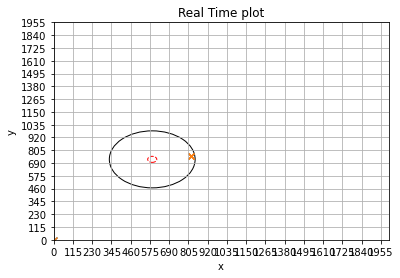

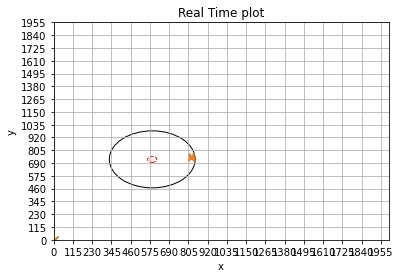

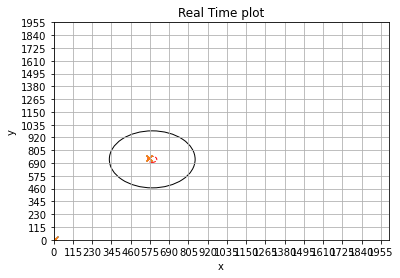

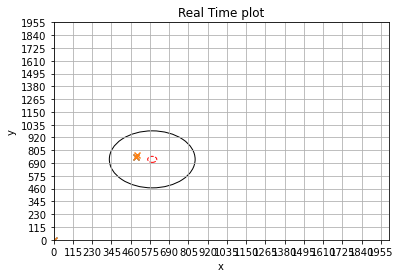

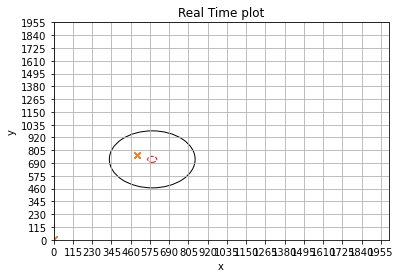

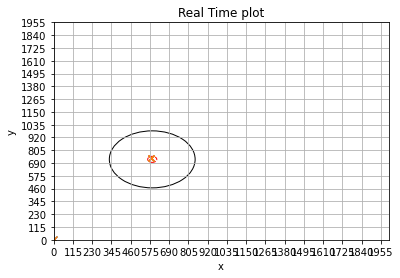

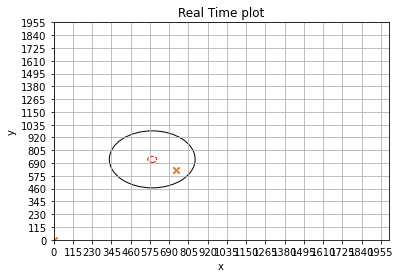

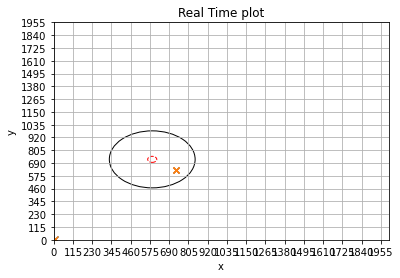

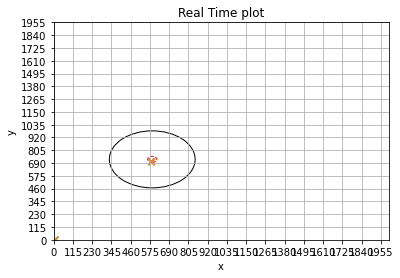

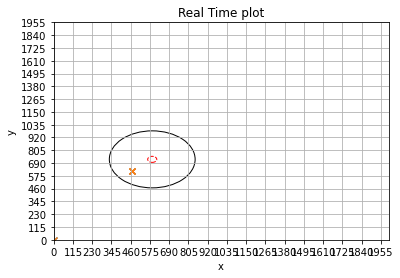

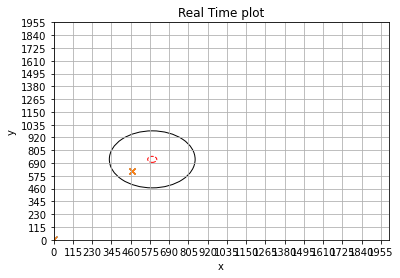

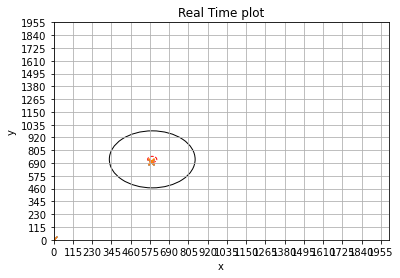

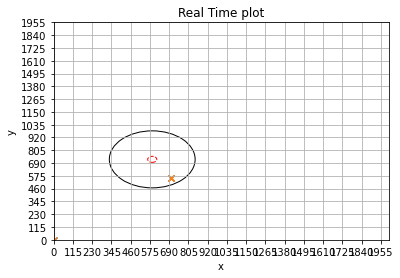

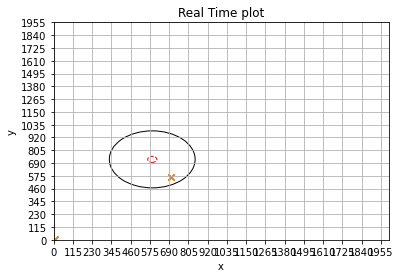

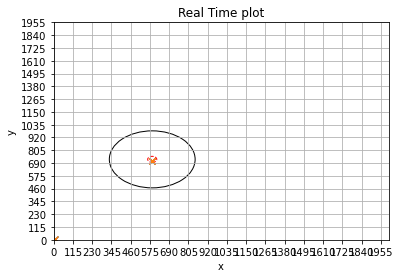

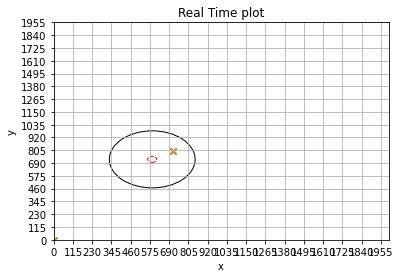

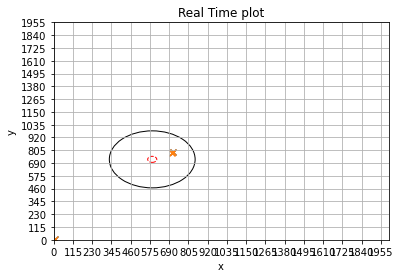

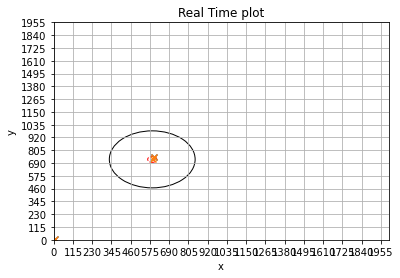

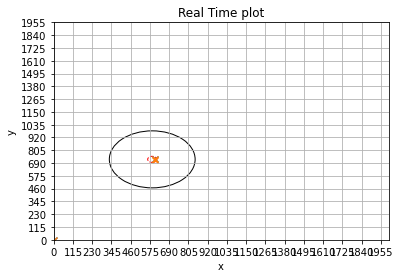

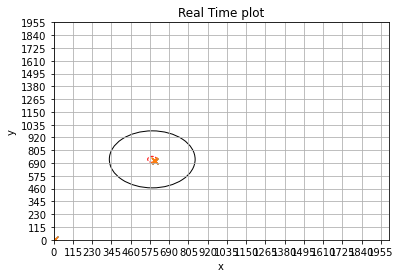

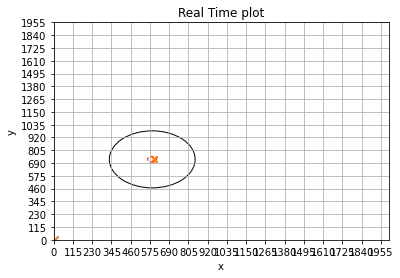

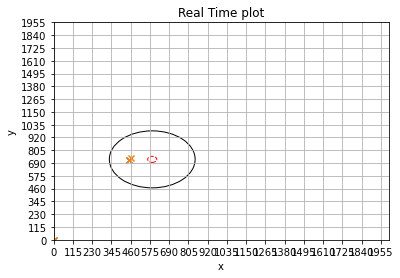

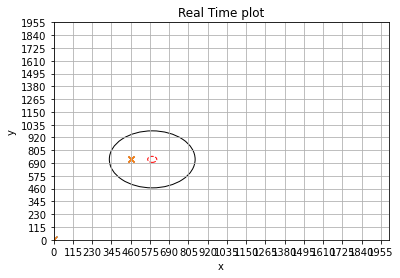

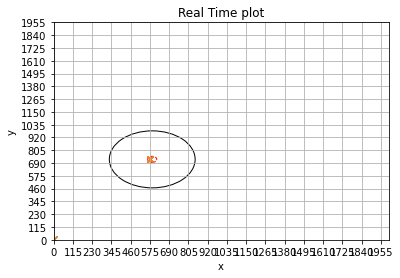

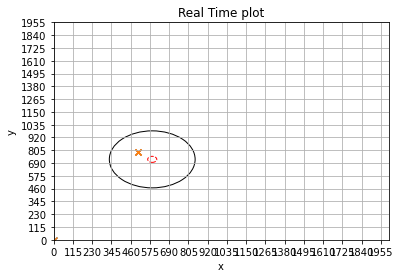

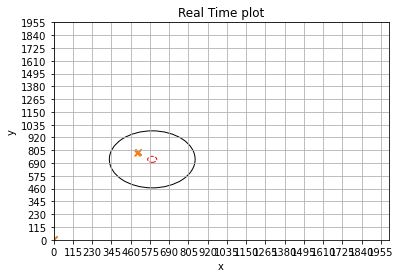

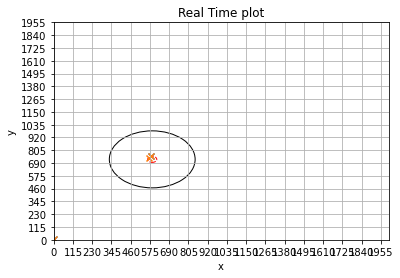

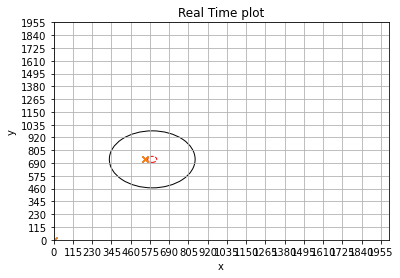

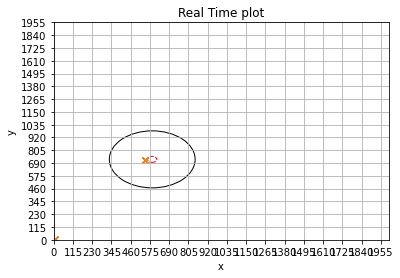

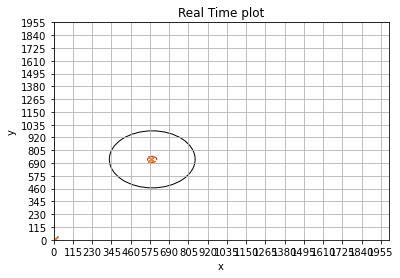

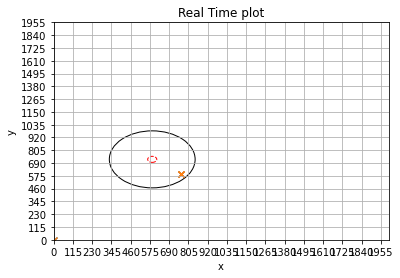

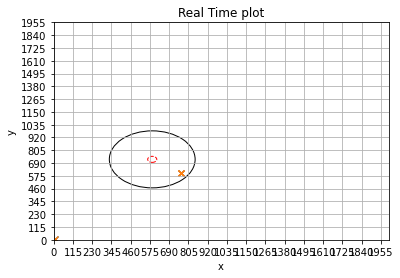

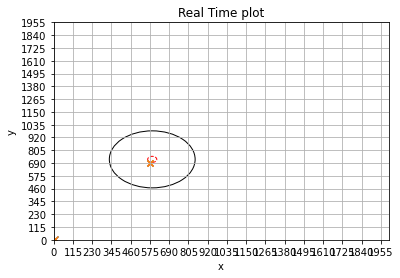

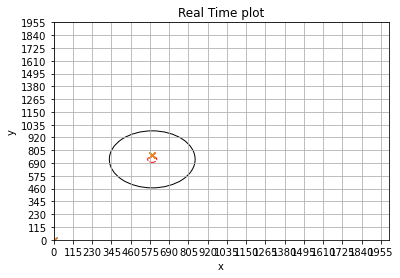

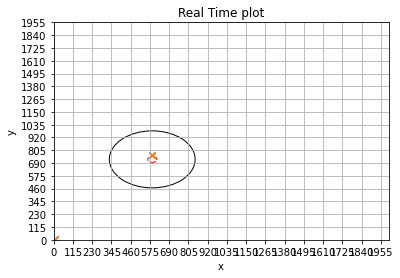

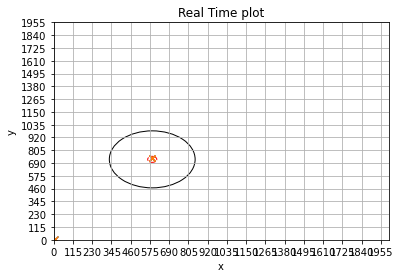

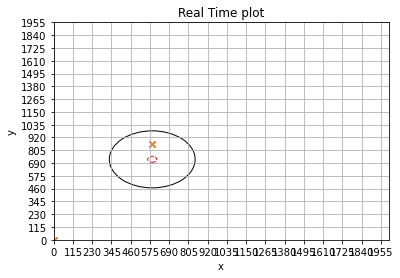

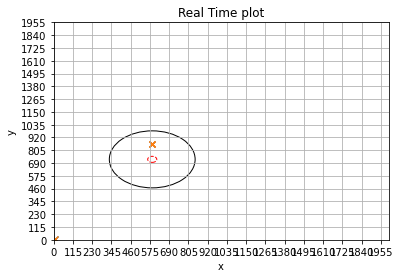

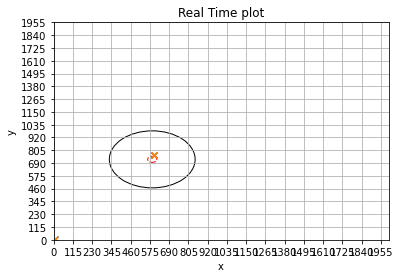

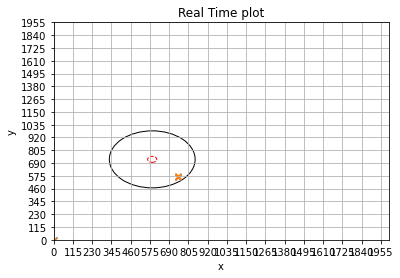

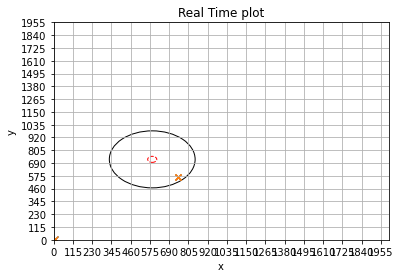

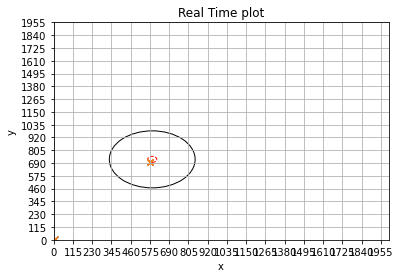

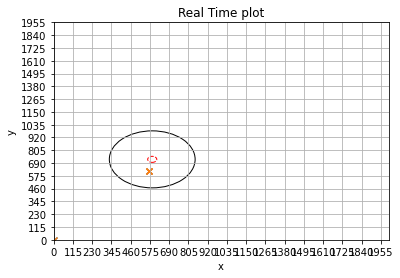

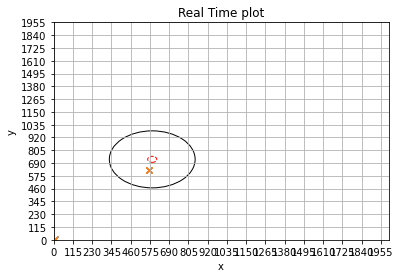

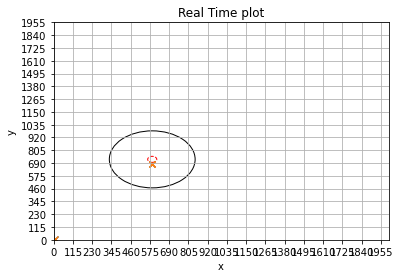

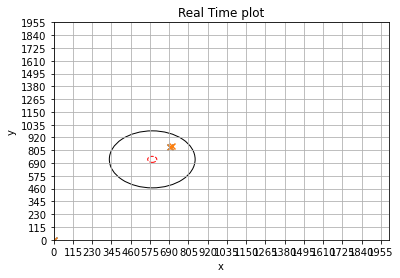

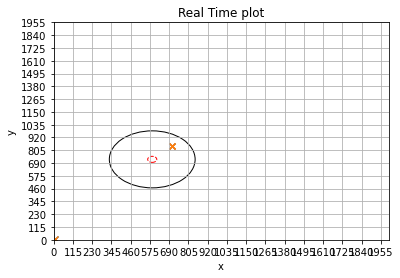

In [5]:
#loop through the test for n trials
n = 1 
while n <= int(trials):
    print('trial #',n)
    x,y = grab_location(_)
    moveXY(circle_x-x,circle_y-y) #send the piezo back to the center
    x,y = grab_location(name) #add new location to CSV
    #time.sleep(1)
    
    desx = str(randxs[n-1]) #use for random moves
    desy = str(randys[n-1])
    
    #desx = str(goalx[n-1]) #use for your choice moves
    #desy = str(goaly[n-1])
    
    dx = float(desx) - x
    dy = float(desy) - y
    
    dict = {'X (mm)': [desx], 'Y (mm)': [desy]}
    df = pd.DataFrame(dict)
    df.to_csv('.\Results\%s.csv' % name, mode='a', index=False, header=False)
    
    #dict = {'X (mm)': [dx], 'Y (mm)': [dy]}
    #df = pd.DataFrame(dict)
    #df.to_csv('.\Results\%s.csv' % name, mode='a', index=False, header=False)
    
    moveXY(dx,dy)
    #time.sleep(1)
    x,y = grab_location(name)
    n += 1
else:
    print('AutoTest complete.')